# Box Plots & Violin Plots

## Overview

**Box plots** and **violin plots** visualize statistical distributions and identify outliers.

### What We'll Learn

**1. Box Plots** 📦
- Creating box plots
- Understanding quartiles
- Identifying outliers
- Multiple groups
- Horizontal/vertical orientation

**2. Violin Plots** 🎻
- Creating violin plots
- KDE visualization
- Combining with box plots
- Split violins
- Customization

**3. Statistical Analysis** 📊
- Quartiles (Q1, Q2, Q3)
- Interquartile range (IQR)
- Outlier detection
- Distribution comparison
- Summary statistics

**4. Advanced Techniques** 🚀
- Notched box plots
- Box plot with swarm
- Grouped violins
- Custom outlier markers

### Box Plot Components

```
┌─ Maximum (Q3 + 1.5*IQR)
│
├─ Q3 (75th percentile) ───┐
│                          │ IQR
├─ Median (Q2, 50th)       │
│                          │
├─ Q1 (25th percentile) ───┘
│
└─ Minimum (Q1 - 1.5*IQR)

● ● Outliers (beyond whiskers)
```

### Why Use These Plots?

```
✓ Show distribution shape
✓ Identify outliers
✓ Compare multiple groups
✓ Visualize quartiles
✓ Compact representation
✓ Statistical summary
```

### Common Use Cases

- **Quality Control**: Process variation
- **A/B Testing**: Compare treatments
- **EDA**: Understand distributions
- **Outlier Detection**: Find anomalies
- **Group Comparison**: Multiple categories

Let's master box and violin plots! 🚀

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline
np.random.seed(42)
print("✅ Setup complete!")

✅ Setup complete!


## 1. Box Plots

### Basic Syntax

```python
# Simple box plot
ax.boxplot(data)

# Multiple groups
ax.boxplot([data1, data2, data3], labels=['A', 'B', 'C'])

# Full parameters
ax.boxplot(data,
          notch=True,              # Notched box
          vert=True,               # Vertical orientation
          widths=0.5,              # Box width
          showmeans=True,          # Show mean marker
          meanline=False,          # Mean as line
          showfliers=True,         # Show outliers
          patch_artist=True,       # Fill boxes
          boxprops={'facecolor': 'lightblue'},
          medianprops={'color': 'red', 'linewidth': 2},
          whiskerprops={'linestyle': '--'},
          capprops={'linewidth': 2},
          flierprops={'marker': 'o', 'markersize': 5})
```

### Understanding Components

```python
# Box: IQR (Q1 to Q3)
# Line in box: Median (Q2)
# Whiskers: 1.5 * IQR from quartiles
# Points beyond: Outliers

Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)  # Median
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
```

### Horizontal Box Plots

```python
ax.boxplot(data, vert=False)  # Horizontal
```

### Notched Box Plots

```python
# Notch indicates confidence interval around median
ax.boxplot(data, notch=True)
# If notches don't overlap, medians are significantly different
```

## 2. Violin Plots

### Basic Syntax

```python
# Simple violin
parts = ax.violinplot(data)

# Multiple groups
parts = ax.violinplot([data1, data2, data3],
                      positions=[1, 2, 3],
                      widths=0.7,
                      showmeans=True,
                      showmedians=True,
                      showextrema=True)
```

### Customizing Violins

```python
parts = ax.violinplot(data)

for pc in parts['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
```

### Best Practices

```
✓ Use box plots for statistical summary
✓ Use violin plots for distribution shape
✓ Combine both for complete picture
✓ Show outliers in box plots
✓ Use notches to compare medians
✗ Don't hide outliers
✗ Don't use for small samples (< 20)
✗ Don't forget axis labels
```

=== BOX & VIOLIN PLOTS ===

Example 1: Multiple Group Box Plot


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_41093/626450586.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([data1, data2, data3],


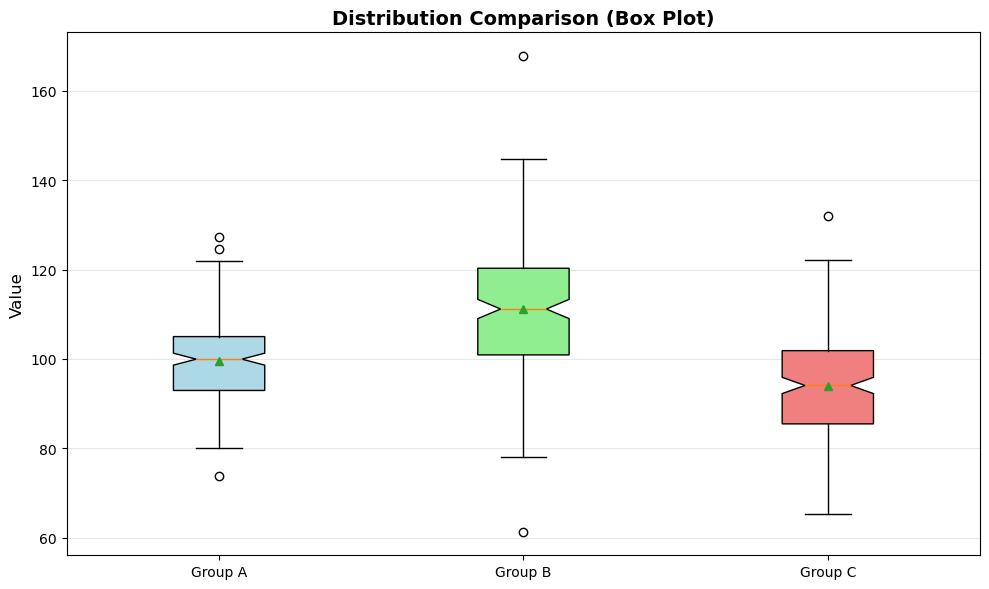


Example 2: Box Plot vs Violin Plot


/var/folders/d1/sfvddbbx4tg14yxq7trqmhyw0000gn/T/ipykernel_41093/626450586.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([data1, data2, data3],


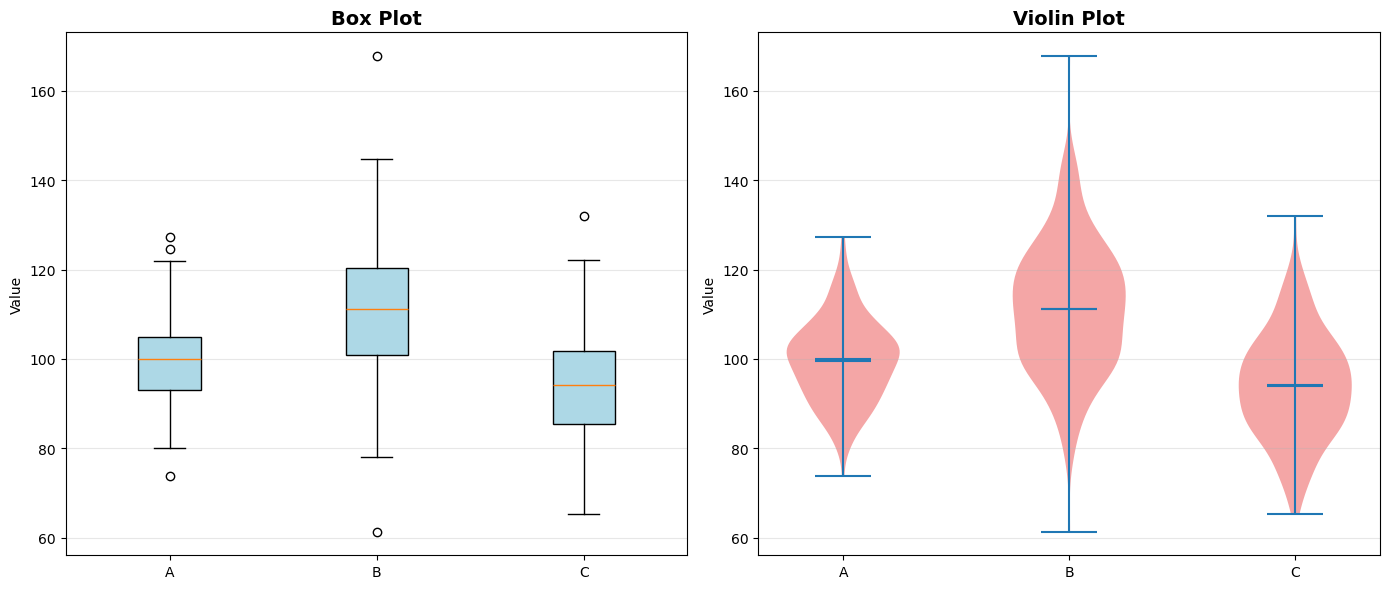


💡 Box plots show statistics, violins show distribution shape


In [2]:
print("=== BOX & VIOLIN PLOTS ===\n")

# Generate sample data
np.random.seed(42)
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(110, 15, 200)
data3 = np.random.normal(95, 12, 200)
data4 = np.concatenate([data1, [150, 155, 160]])  # With outliers

# Example 1: Basic box plot
print("Example 1: Multiple Group Box Plot")

fig, ax = plt.subplots(figsize=(10, 6))

bp = ax.boxplot([data1, data2, data3], 
                labels=['Group A', 'Group B', 'Group C'],
                patch_artist=True,
                showmeans=True,
                notch=True)

# Color boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Distribution Comparison (Box Plot)', 
            fontsize=14, fontweight='bold')
ax.set_ylabel('Value', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Example 2: Box vs Violin
print("\n" + "="*70)
print("Example 2: Box Plot vs Violin Plot")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
bp = axes[0].boxplot([data1, data2, data3],
                     labels=['A', 'B', 'C'],
                     patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_title('Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3, axis='y')

# Violin plot
vp = axes[1].violinplot([data1, data2, data3],
                        positions=[1, 2, 3],
                        showmeans=True,
                        showmedians=True)
for pc in vp['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(['A', 'B', 'C'])
axes[1].set_title('Violin Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Box plots show statistics, violins show distribution shape")

## Practice & Summary

### Practice Exercises
1. Basic box plot with 3 groups
2. Add mean markers
3. Create notched box plot
4. Horizontal box plot
5. Violin plot with customization
6. Combined box + violin
7. Detect outliers programmatically
8. Compare distributions statistically

### Quick Reference

```python
# Box plot
ax.boxplot([d1, d2], labels=['A', 'B'], 
          patch_artist=True, showmeans=True)

# Violin plot
ax.violinplot([d1, d2], positions=[1, 2],
             showmeans=True, showmedians=True)

# Outlier detection
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
```

### Key Concepts
- **Box plot**: Shows quartiles and outliers
- **Violin plot**: Shows distribution density
- **IQR**: Interquartile range (Q3 - Q1)
- **Outliers**: Beyond 1.5 * IQR from quartiles
- **Notch**: CI around median

**Next: 09_heatmaps.ipynb**